In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("xtick",labelsize = 15)
plt.rc("ytick",labelsize = 15)

# for Animation 
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML , Image # for gif 
rc("animation" , html = "html5")

In [2]:
data = pd.read_excel('/content/ed.xlsx')  
data1 = data.to_numpy()  
data2 = data1.reshape(7,6)
x_data = data2[:,0]
y_data = data2[:,1]
Ex_data = data2[:,2]
Ey_data = data2[:,3]
Dx = data2[:,4]
Dy = data2[:,5]

In [3]:
data

,x,y,Ex,Ey,Dx_obs_uncorrected,Dy_obs_uncorrected
0,-1.261,-0.160,-0.587,0.036,-1.416,-1.324
1,-0.160,-1.107,-0.557,-0.789,-1.221,-1.312
2,0.334,0.472,-0.186,1.336,-1.054,-0.944
3,0.348,0.360,-0.222,1.574,-1.079,-0.862
4,0.587,1.099,0.080,0.726,-1.012,-0.932
5,0.860,1.321,0.158,0.589,-0.999,-0.948
6,1.079,-0.328,1.540,-0.156,-0.733,-1.019


In [4]:
Dy

array([-1.324, -1.312, -0.944, -0.862, -0.932, -0.948, -1.019])

In [5]:
def D(x,y,c,E,a,b,r):  # r = alpha 
  return (a*x) + (b*y) + c + (r*E)

In [6]:
# def D_y(x,y,f,Ey,d,e,r):  # r = alpha 
#   return (d*x) + (e*y) + f + (r*Ey)

In [7]:
def likelihood(x,y,Ex,Ey,a,b,c,d,e,f,r):   # log likelihood 
  s = 0.05
  p = 1/(2*np.pi)
  u = p/(s**2)
  v = (-0.5)/(s**2)
  z = 0
  for i in range (len(x)):
   z += np.log(u) + ( v * ((Dx[i] - D(x[i],y[i],c,Ex[i],a,b,r))**2)) + ( v * ((Dy[i] - D(x[i],y[i],f,Ey[i],d,e,r))**2))
  return (z) 

In [8]:
def  MCMC(sig,n):  # sig = sigma ,  n = no.of iterations
  a0 ,b0, c0, d0, e0, f0, r0 = np.random.uniform(0,1,7)
  r_hist = np.zeros(n)
  r_hist[0] = r0
  count = 0 
  
  for i in range (1,n):
    a = np.random.normal(a0,sig)
    b = np.random.normal(b0,sig) 
    c = np.random.normal(c0,sig)
    d = np.random.normal(d0,sig)
    e = np.random.normal(e0,sig) 
    f = np.random.normal(f0,sig)
    r = np.random.normal(r0,sig)
    h = np.exp(likelihood(x_data,y_data,Ex_data,Ey_data,a,b,c,d,e,f,r) - likelihood(x_data,y_data,Ex_data,Ey_data,a0,b0,c0,d0,e0,f0,r0))
    #print(h)
    h1 = min((h,1))

    g = np.random.uniform(0,1)
    
    if g < h1:
      a0,b0,c0,d0,e0,r0,f0 = a,b,c,d,e,r,f
      #r_hist[i] = r
      if i>=int(0.1 * n): # counting after burn-in
        count += 1
      
      
    else : 
      a0,b0,c0,d0,e0,r0,f0 = a0,b0,c0,d0,e0,r0,f0
      #r_hist[i] = r0


    r_hist[i] = r0
   

  return r_hist , count

In [9]:
r1, t = MCMC(0.05,4000)

<ipython-input-8-5752c79d97a3>:15: RuntimeWarning: overflow encountered in exp
  h = np.exp(likelihood(x_data,y_data,Ex_data,Ey_data,a,b,c,d,e,f,r) - likelihood(x_data,y_data,Ex_data,Ey_data,a0,b0,c0,d0,e0,f0,r0))


In [10]:
i = np.linspace(0,4000,4000)


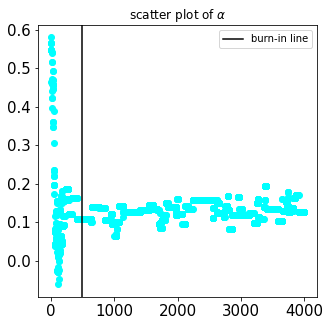

In [11]:
 
plt.figure(figsize =(5,5))
plt.title("scatter plot of $\\alpha$")
plt.scatter(i,r1,color ="cyan")
plt.axvline(x=500,color="k",label = "burn-in line")
plt.legend()

In [12]:
n = 4000
burn_in =int(0.1 * n)

In [13]:
r_burn = r1[burn_in:] 
  
acpt_no1 = t / n

In [14]:
t

75

In [15]:
print("acceptance ratio:",acpt_no1)

acceptance ratio: 0.01875


(array([ 32.,   0.,  48.,  11., 108., 179., 437.,  40., 336., 561., 622.,
        413., 176.,  98., 373.,  89.,  49.,   4.,   0.,  24.]),
 array([0.06383601, 0.07030407, 0.07677212, 0.08324018, 0.08970823,
        0.09617629, 0.10264435, 0.1091124 , 0.11558046, 0.12204851,
        0.12851657, 0.13498462, 0.14145268, 0.14792073, 0.15438879,
        0.16085684, 0.1673249 , 0.17379295, 0.18026101, 0.18672907,
        0.19319712]),
 <BarContainer object of 20 artists>)

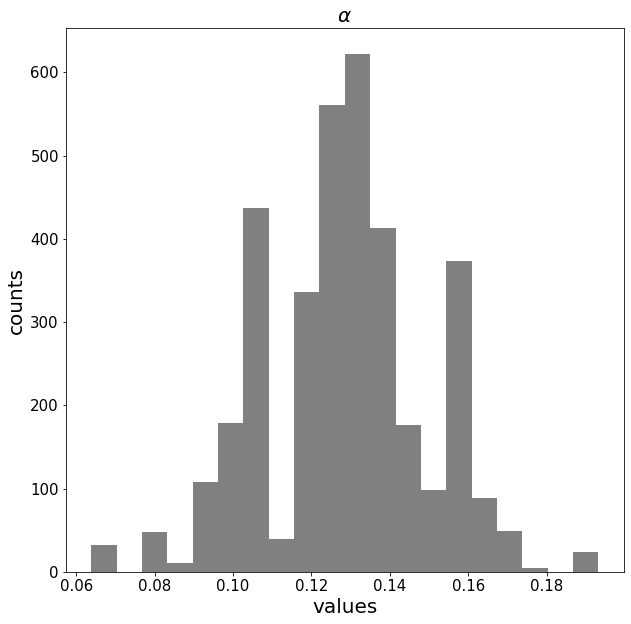

In [16]:
plt.figure(figsize =(10,10))
plt.ylabel("counts",fontsize = 20)
plt.xlabel("values",fontsize = 20)
plt.title('$\\alpha$',fontsize = 20)
plt.hist(r_burn,bins = 20,color = "grey")

In [17]:
m = np.mean(r_burn)
var = np.std(r_burn)
print("mean of alpha:",m)
print("variance of alpha:",var**2)

mean of alpha: 0.12894348576854667
variance of alpha: 0.0004244007927931944


In [18]:
# for plotting 
# plt.figure (figsize = (20,20))
# plt.subplot(1,2,1)
# plt.xlabel("No. of iterations" , fontsize = 20)
# plt.ylabel(" $\alpha$ -values",fontsize = 20)
# plt.scatter(r2, color ="grey" )

# plt.title('$\alpha$(scatter plot)',fontsize= 20)


# plt.subplot(1,2,2)
# plt.ylabel("No.of occurence",fontsize = 20)
# plt.xlabel("$\alpha$-values",fontsize = 20)
# plt.hist(r2,color ="grey" , bins = 100)

# plt.title('$\alpha$',fontsize = 20)

In [19]:
n = 4000
k = np.geomspace(0.001,5,50)
acpt_ratio = []
for j in range(len(k)): 
  r = MCMC(k[j],4000)[1]
  
  acpt_ratio.append(r/n)
acpt_ratio_plot = np.asarray(acpt_ratio)
# print(acpt_ratio_plot)

<ipython-input-8-5752c79d97a3>:15: RuntimeWarning: overflow encountered in exp
  h = np.exp(likelihood(x_data,y_data,Ex_data,Ey_data,a,b,c,d,e,f,r) - likelihood(x_data,y_data,Ex_data,Ey_data,a0,b0,c0,d0,e0,f0,r0))


In [20]:
print(acpt_ratio_plot)

[5.1650e-01 5.3975e-01 5.3850e-01 5.1325e-01 5.8875e-01 5.7925e-01
 5.9475e-01 6.4275e-01 6.7700e-01 6.4725e-01 6.2300e-01 5.8500e-01
 5.6725e-01 5.1250e-01 4.5525e-01 3.9825e-01 3.2375e-01 2.5525e-01
 1.8625e-01 1.3425e-01 9.5500e-02 5.2250e-02 2.5000e-02 1.3250e-02
 5.7500e-03 6.7500e-03 2.2500e-03 1.2500e-03 7.5000e-04 1.2500e-03
 1.0000e-03 7.5000e-04 1.7500e-03 0.0000e+00 7.5000e-04 2.5000e-04
 5.0000e-04 7.5000e-04 7.5000e-04 2.5000e-04 5.0000e-04 2.5000e-04
 1.0000e-03 5.0000e-04 2.5000e-04 0.0000e+00 5.0000e-04 5.0000e-04
 2.5000e-04 2.5000e-04]


Text(0.5, 1.0, 'acceptance ratio plot')

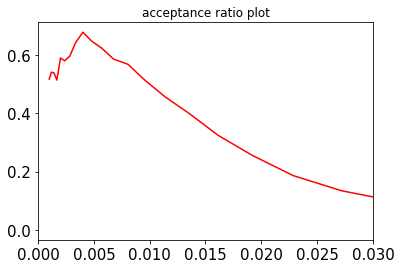

In [21]:
plt.xlim(0,0.03)
plt.plot(k,acpt_ratio_plot,color = "r")
plt.title("acceptance ratio plot")
#plt.xscale('log')

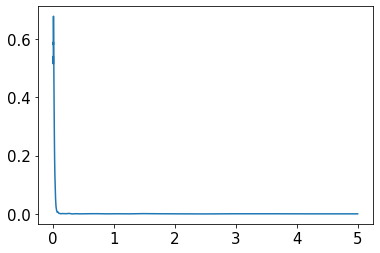

In [22]:
plt.plot(k,acpt_ratio_plot)